In [8]:
import numpy as np
import pandas as pd

import math 
import matplotlib as mp
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

from scipy.stats import chi2_contingency

%matplotlib inline
sns.set_palette('deep')

mydata=pd.read_csv('Wholesale+Customers+Data.csv')
mydata1=pd.read_csv('Wholesale+Customers+Data.csv')



In [9]:
mydata.describe()


,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
mydata.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [10]:
mydata['spend']=mydata['Fresh']+mydata['Milk']+mydata['Grocery']+mydata['Frozen']+mydata['Detergents_Paper']+mydata['Delicatessen']
mydata

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [11]:
#spend by region 
groupedvalues_region=mydata.groupby('Region').sum().reset_index()
groupedvalues_region=groupedvalues_region.drop('Buyer/Spender',axis=1)
groupedvalues_region.head()


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,spend
0,Lisbon,854833,422454,570037,231026,204136,104327,2386813
1,Oporto,464721,239144,433274,190132,173311,54506,1555088
2,Other,3960577,1888759,2495251,930492,890410,512110,10677599


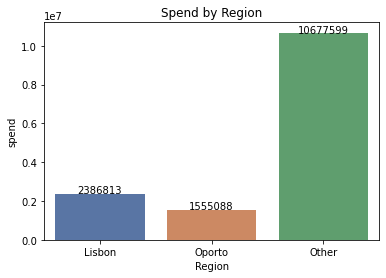

In [21]:
g=sns.barplot(x='Region',y='spend',data=groupedvalues_region)
plt.title('Spend by Region')

for index, row in groupedvalues_region.iterrows():
    g.text(row.name,row.spend,round(row.spend,2),color='black', ha="center")

In [12]:
# spendbychannel
groupedvalues_channel=mydata.groupby('Channel').sum().reset_index()
groupedvalues_channel=groupedvalues_channel.drop('Buyer/Spender',axis=1)
groupedvalues_channel.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,spend
0,Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
1,Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


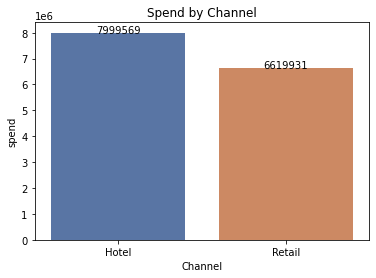

In [13]:
g=sns.barplot(x='Channel',y='spend',data=groupedvalues_channel)
plt.title('Spend by Channel')

for index, row in groupedvalues_channel.iterrows():
    g.text(row.name,row.spend,round(row.spend,2),color='black', ha="center")

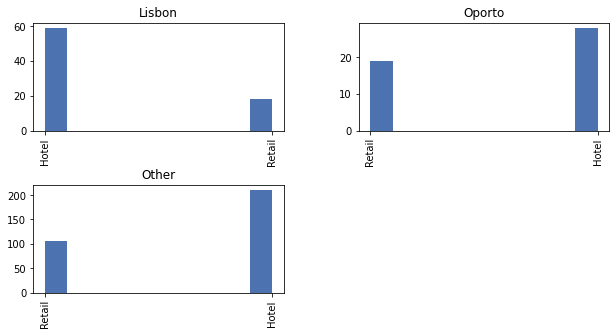

In [14]:
g=mydata.hist(by='Region',column='Channel',figsize=(10,5));

In [15]:
#OBSERVATIONS
#1.	Regions- "Other" category has the highest spending; Oporto has the lowest spending
#2.	Hoetls have higher spend compared to retail (Overall and regional level)


In [16]:
#1.2
mydata=mydata.sort_values(by=['Region','Channel','spend'],ascending= False)
mydata

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,spend
85,86,Retail,Other,16117,46197,92780,1026,40827,2944,199891
47,48,Retail,Other,44466,54259,55571,7782,24171,6465,192714
61,62,Retail,Other,35942,38369,59598,3254,26701,2017,165881
86,87,Retail,Other,22925,73498,32114,987,20070,903,150497
23,24,Retail,Other,26373,36423,22019,5154,4337,16523,110829
...,...,...,...,...,...,...,...,...,...,...
250,251,Hotel,Lisbon,3191,1993,1799,1730,234,710,9657
206,207,Hotel,Lisbon,6373,780,950,878,288,285,9554
228,229,Hotel,Lisbon,1869,577,572,950,4762,203,8933
219,220,Hotel,Lisbon,4155,367,1390,2306,86,130,8434


Text(0, 0.5, 'No of Buyers')

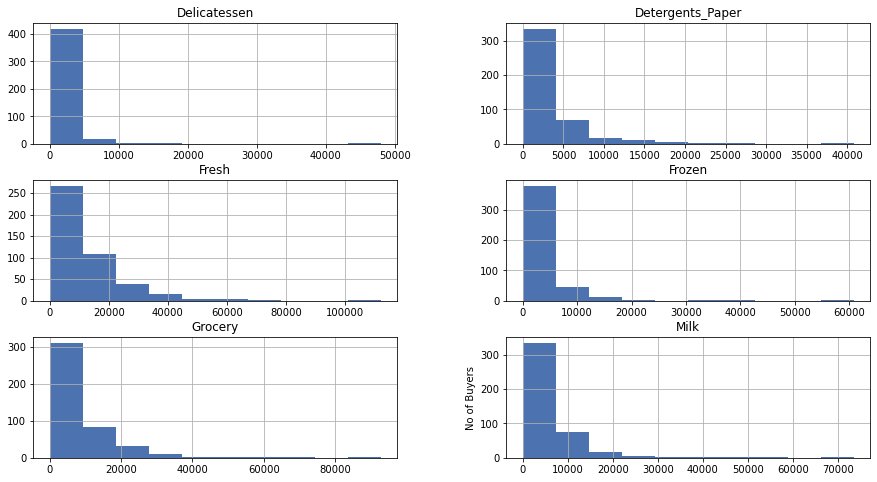

In [17]:
mydata3=pd.read_csv('Wholesale+Customers+Data.csv')
mydata3=mydata3.drop('Buyer/Spender',axis=1)
mydata3=mydata3.drop('Region',axis=1)
mydata=mydata.sort_values(by=['Channel','spend'], ascending=False)
mydata3.hist(figsize=(15,8))
plt.ylabel('No of Buyers')


Text(0, 0.5, 'No of Buyers')

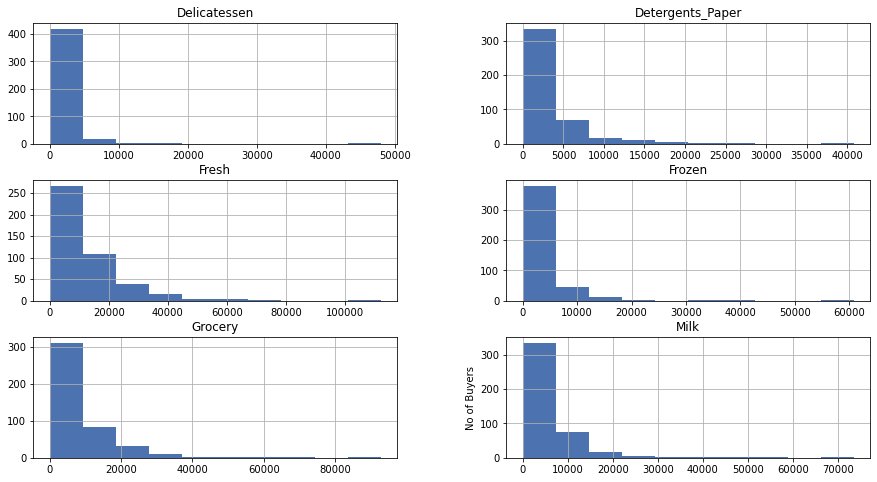

In [20]:
#region analysis
mydata4=pd.read_csv('Wholesale+Customers+Data.csv')
mydata4=mydata4.drop('Buyer/Spender',axis=1)
mydata3=mydata3.drop('Channel',axis=1)

mydata3.hist(figsize=(15,8))
plt.ylabel('No of Buyers')


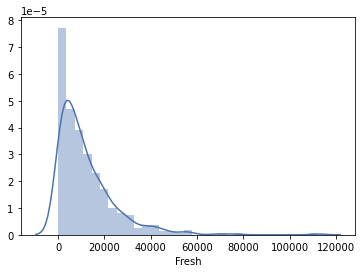

In [22]:
sns.distplot(mydata['Fresh']);


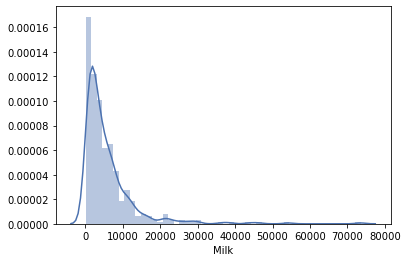

In [23]:
sns.distplot(mydata['Milk']);


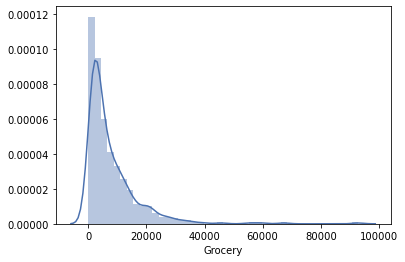

In [24]:
sns.distplot(mydata['Grocery']);

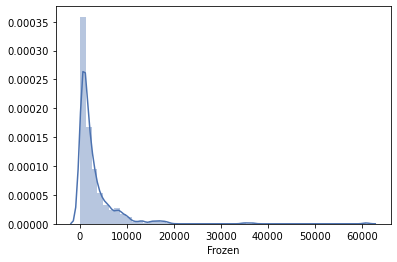

In [25]:
sns.distplot(mydata['Frozen']);

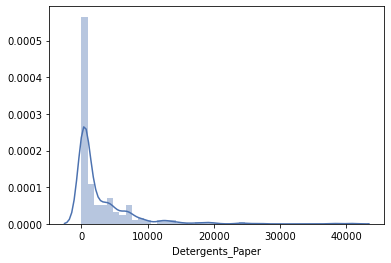

In [26]:
sns.distplot(mydata['Detergents_Paper']);

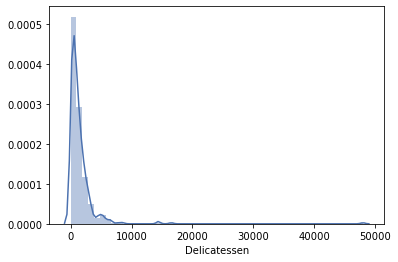

In [27]:
sns.distplot(mydata['Delicatessen']);

In [28]:
#Data is left skewed; All varieties show similar behaviour across Region and Channel.

In [29]:
#1.3
#When a distribution has lower variability, the values in a dataset are more consistent. However, when the variability is higher, the data points are more dissimilar and extreme values become more likely. Consequently, understanding variability helps you grasp the likelihood of unusual events.

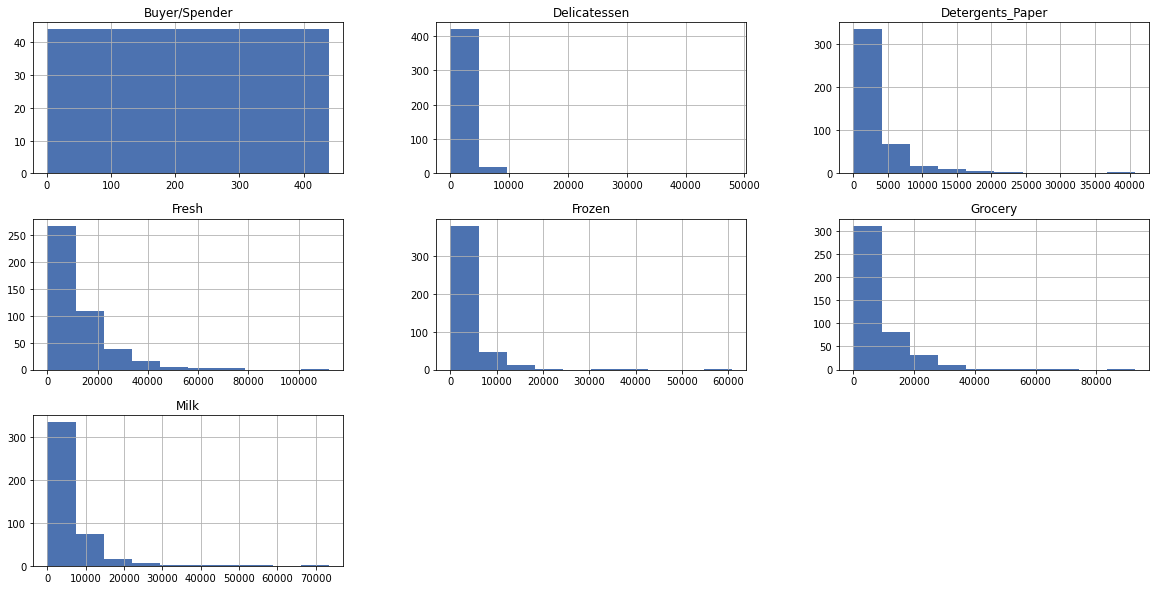

In [31]:
mydata1.hist(figsize=(20,10));


In [45]:
#On the basis of descriptive measure of variability, which item shows the most inconsistent
#behavior? Which items show the least inconsistent behaviour?

mydata1.std()

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

#Fresh - Most Inconsistant (Highest Std Dev)
#Delicatessen - Least Inconsistant (Lowest Std Dev) 
The coefficient of variation will help to determine the degree of variation in the data even if
means are drastically different.This can be used to determine the consistency across the items.
Below is the coefficient of variation(calculated with the formula standard deviation/mean) for the
data showing that the item with the least inconsistent behaviour is ‘Fresh’ whereas the item
showing the most inconsistent behaviour is ‘Delicatessen’.


In [34]:
#ouTliers in data
mydata1.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [44]:
#1.4 Are there any outliers in the data?

mydata1.columns

Index(['Buyer/Spender', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen'],
      dtype='object')

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

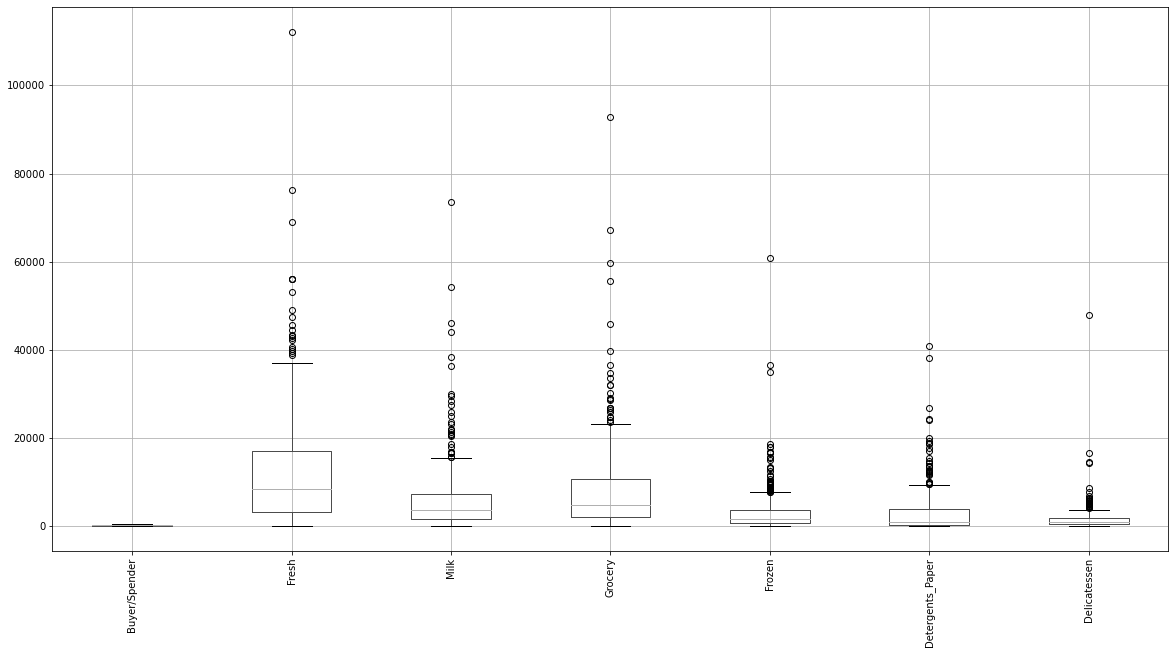

In [39]:
mydata1=mydata1.drop('Channel',axis=1)
mydata1=mydata1.drop('Region',axis=1)
fig=plt.figure(figsize=(20,10))
df=pd.DataFrame(data=mydata1,columns=mydata1.columns)
df.boxplot();
plt.xticks(rotation=90)



#print(mydata1 < (q1- 1.5*IQR))/(mydata1>(q3+1.5*IQR))
As seen in the above plot, all the above items have outliers present in the data and also
we can notice data for median and IQR also not evenly placed for few such as
Detergents Paper.There are extreme outlier occurrences for all of these items.


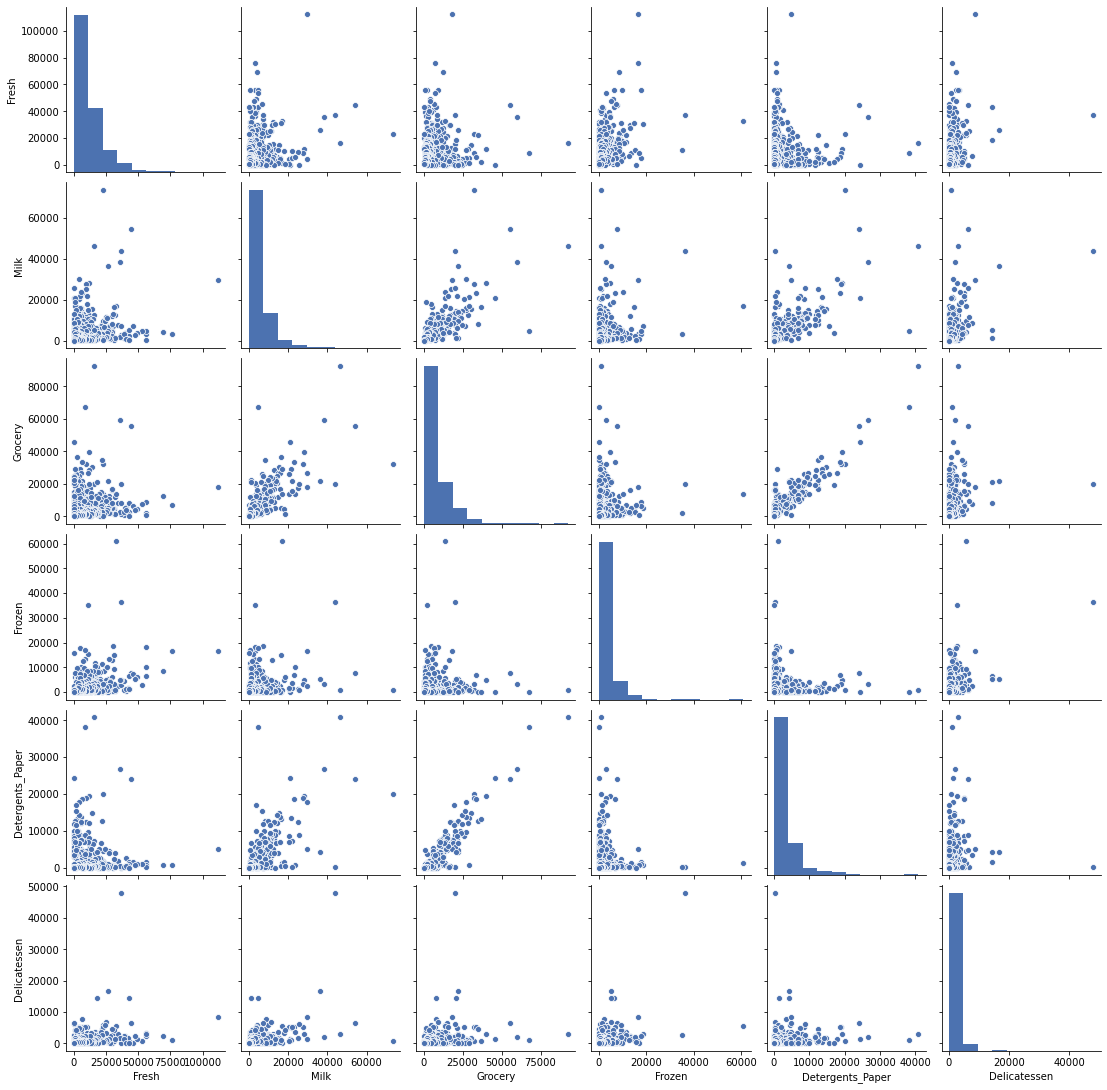

In [43]:
sns.pairplot(mydata[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']]);

#5
1.5 On the basis of this report, what are the recommendations?
Business Recommendations:
-There are many max outliers in the data for each of the items in each region
across every channel.This indicates that a large no of sales can be attributed to
some specific buyers.Additional consideration in the business should be taken for
these buyers to ensure long term retention.
-It can be noticed that the overall sales in Hotels is much higher CoMpared to the sales in
Retail.The distributor may consider Retail channel as a target area for further
expansion on growth.
-As the skewness of delicatessen is very high, it indicates the dependency of
sales on few buyers depicting a high risk and high dependency

#2The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates. 